importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')   

Data Collection

In [4]:
diabetes_data = pd.read_csv("diabetes.csv",header=0)
print(diabetes_data.to_string())

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0              6      148             72             35        0  33.6                     0.627   50        1
1              1       85             66             29        0  26.6                     0.351   31        0
2              8      183             64              0        0  23.3                     0.672   32        1
3              1       89             66             23       94  28.1                     0.167   21        0
4              0      137             40             35      168  43.1                     2.288   33        1
5              5      116             74              0        0  25.6                     0.201   30        0
6              3       78             50             32       88  31.0                     0.248   26        1
7             10      115              0              0        0  35.3                     0.134   29        0
8

Data Preparation

In [5]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
diabetes_data.shape

(768, 9)

In [8]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
corr_rel=diabetes_data.corr()

<Axes: >

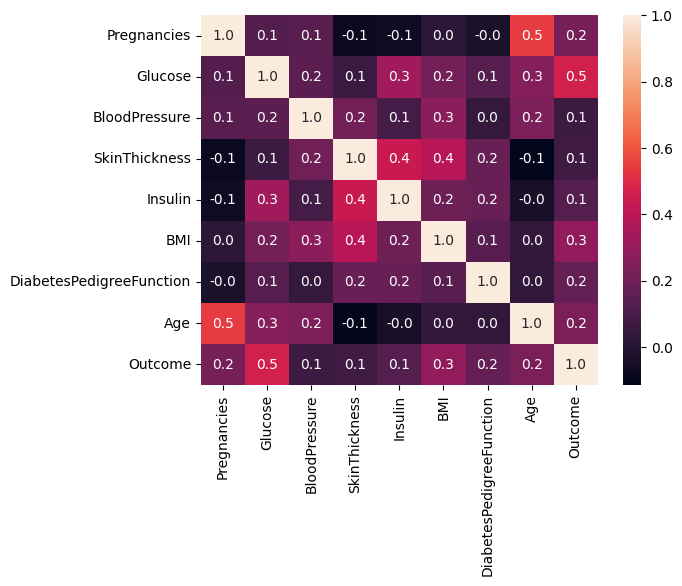

In [28]:
sns.heatmap(data=corr_rel, annot=True,fmt="0.1f")

<Axes: xlabel='Glucose', ylabel='BMI'>

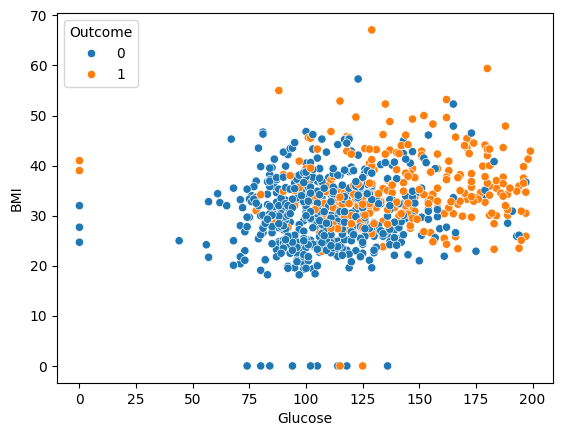

In [11]:
sns.scatterplot(data=diabetes_data,x=diabetes_data["Glucose"],y=diabetes_data["BMI"],hue="Outcome")

Data scaling

In [12]:
x=diabetes_data.drop("Outcome",axis=1)
y=diabetes_data["Outcome"]

In [13]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
print(x_scaled)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [14]:
X=x_scaled
Y=y

In [15]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split

In [172]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y , random_state=43)

In [173]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


Model Building

In [174]:
Model=SVC(kernel='linear')
Model.fit(x_train,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [175]:
y_train_predict=Model.predict(x_train)
acc_scr=accuracy_score(y_train_predict,y_train)

In [176]:
print("accuracy_score of model on training data ",acc_scr*100)

accuracy_score of model on training data  77.0358306188925


In [177]:
ypredict=Model.predict(x_test)
acc_scr1=accuracy_score(ypredict,y_test)

In [178]:
print("accuracy_score of model on testing data ",acc_scr1*100)

accuracy_score of model on testing data  79.22077922077922


Prediction Machinism

In [179]:
input1=scaler.transform(np.array([3,120,70,30,135,42.9,0.452,30]).reshape(1,-1))

prediction1=Model.predict(input1)
print(prediction1)

input2=scaler.transform(np.array([2,197,70,45,543,30.5,0.158,53]).reshape(1,-1))

prediction2=Model.predict(input2)
print(prediction2)



[0]
[1]


Expermintal

In [180]:
Logistic_Regression = LogisticRegression()
KNeighbors_Classifier = KNeighborsClassifier()
Support_Vector_Classifier = SVC()
Random_Forest_Classifier = RandomForestClassifier()
Gradient_Boosting_Classifier = GradientBoostingClassifier()

Models=[Logistic_Regression,KNeighbors_Classifier,Support_Vector_Classifier,Random_Forest_Classifier,Gradient_Boosting_Classifier]

In [181]:
for i in (Models):
    i.fit(x_train,y_train)
    train_ypredd = i.predict(x_train)
    acc_scr=accuracy_score(train_ypredd,y_train)
    print(i)
    print(acc_scr)
    print("--------------------------")

LogisticRegression()
0.7785016286644951
--------------------------
KNeighborsClassifier()
0.8078175895765473
--------------------------
SVC()
0.8289902280130294
--------------------------


RandomForestClassifier()
1.0
--------------------------
GradientBoostingClassifier()
0.9315960912052117
--------------------------


In [182]:
for i in (Models):
    ypredd = i.predict(x_test)
    acc_scr=accuracy_score(ypredd,y_test)
    print(i)
    print(acc_scr)
    print("--------------------------")

LogisticRegression()
0.8051948051948052
--------------------------
KNeighborsClassifier()
0.7532467532467533
--------------------------
SVC()
0.7857142857142857
--------------------------
RandomForestClassifier()
0.7792207792207793
--------------------------
GradientBoostingClassifier()
0.7857142857142857
--------------------------
